In [178]:
import numpy as np
import pandas as pd

# Charts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# NLP
import re
import nltk
from nltk import tokenize
from nltk.corpus import stopwords

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer

In [179]:
# downaload the stopwords
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/maciej/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to

True

In [180]:
# Load the data
# TODO: Check the pyreadstat library to read directly from .sav file 
# Data path
data_path = 'data/teach AI 12.12.23.csv'
data = pd.read_csv(data_path, decimal=',')
data.head()

,POST___TRAVEL,POST___ABORTION,ADM,RIV,ID,CNI_check,GCB_check_,Progress,Finished,Gender,...,Other_portals_6,Other_portals_7,Other_portals_7_TEXT,CNI_MEAN,FFNI___SSF_2_R,FFNI_Antagonism,FFNI_Neurotic,FFNI_Agentic,GCB_MEAN,PUR_MEAN
0,"We travellee to australia, the country was hot...",Banning abortion is against human rights if ch...,3.33,2.78,63e55ecaa002eb54284210e8,#NULL!,#NULL!,100.0,1,1,...,#NULL!,#NULL!,NaN,3.69,4.0,2.86,3.33,3.75,5.00,3.67
1,Recently went to Iceland and can't believe how...,"Once again, men are dictating what women shoul...",2.78,1.22,60562563c658b51a10bc7a4d,6,2,100.0,1,2,...,1,#NULL!,NaN,5.06,2.0,1.29,1.33,3.25,2.87,1.80
2,So excited to pick up my new BMW. It will be g...,Very unsure on the new government legislation....,3.22,1.44,654fa30e4eaf197c8678b860,6,2,100.0,1,2,...,1,#NULL!,NaN,4.06,4.0,1.57,4.00,3.75,3.13,2.93
3,Time travelling in thf future and back in time,Don't agree . There should be freedom of choice,3.89,2.67,637f7c2db2e351960e722a15,6,2,100.0,1,1,...,#NULL!,#NULL!,NaN,4.25,3.0,2.71,3.67,3.50,1.20,2.53
4,barcelona is my favourite place to visit,everyone has a right to bodily autonomy - bann...,1.44,1.78,60bf0f6824fa105c814baabc,6,4,100.0,1,1,...,#NULL!,#NULL!,NaN,4.06,3.0,2.86,3.33,3.50,4.00,3.07


In [181]:
# Analyze the data
# Check the data types
data.dtypes

POST___TRAVEL                object
POST___ABORTION              object
ADM                         float64
RIV                         float64
ID                           object
CNI_check                    object
GCB_check_                   object
Progress                    float64
Finished                      int64
Gender                        int64
Gender_3_TEXT                object
Age                           int64
Ethnic_background             int64
Ethnic_background_8_TEXT     object
Location                     object
Education                     int64
Education_6_TEXT             object
Employment                    int64
Employment_7_TEXT            object
Marital_status                int64
Twitter                       int64
Other_portals_1              object
Other_portals_2              object
Other_portals_3              object
Other_portals_4              object
Other_portals_5              object
Other_portals_6              object
Other_portals_7             

In [182]:
# List of not needed columns to drop:
columns_to_drop = ['ID','CNI_check','GCB_check_',
                   'Progress','Finished','Location']
data.drop(columns=columns_to_drop, inplace=True)
data.head()

,POST___TRAVEL,POST___ABORTION,ADM,RIV,Gender,Gender_3_TEXT,Age,Ethnic_background,Ethnic_background_8_TEXT,Education,...,Other_portals_6,Other_portals_7,Other_portals_7_TEXT,CNI_MEAN,FFNI___SSF_2_R,FFNI_Antagonism,FFNI_Neurotic,FFNI_Agentic,GCB_MEAN,PUR_MEAN
0,"We travellee to australia, the country was hot...",Banning abortion is against human rights if ch...,3.33,2.78,1,NaN,38,1,NaN,2,...,#NULL!,#NULL!,NaN,3.69,4.0,2.86,3.33,3.75,5.00,3.67
1,Recently went to Iceland and can't believe how...,"Once again, men are dictating what women shoul...",2.78,1.22,2,NaN,28,8,British,1,...,1,#NULL!,NaN,5.06,2.0,1.29,1.33,3.25,2.87,1.80
2,So excited to pick up my new BMW. It will be g...,Very unsure on the new government legislation....,3.22,1.44,2,NaN,31,1,NaN,2,...,1,#NULL!,NaN,4.06,4.0,1.57,4.00,3.75,3.13,2.93
3,Time travelling in thf future and back in time,Don't agree . There should be freedom of choice,3.89,2.67,1,NaN,57,1,NaN,2,...,#NULL!,#NULL!,NaN,4.25,3.0,2.71,3.67,3.50,1.20,2.53
4,barcelona is my favourite place to visit,everyone has a right to bodily autonomy - bann...,1.44,1.78,1,NaN,28,1,NaN,4,...,#NULL!,#NULL!,NaN,4.06,3.0,2.86,3.33,3.50,4.00,3.07


In [183]:
# Change the values #NULL! to np.nan
data.replace('#NULL!', np.nan, inplace=True)
data.head(2)

,POST___TRAVEL,POST___ABORTION,ADM,RIV,Gender,Gender_3_TEXT,Age,Ethnic_background,Ethnic_background_8_TEXT,Education,...,Other_portals_6,Other_portals_7,Other_portals_7_TEXT,CNI_MEAN,FFNI___SSF_2_R,FFNI_Antagonism,FFNI_Neurotic,FFNI_Agentic,GCB_MEAN,PUR_MEAN
0,"We travellee to australia, the country was hot...",Banning abortion is against human rights if ch...,3.33,2.78,1,NaN,38,1,NaN,2,...,NaN,NaN,NaN,3.69,4.0,2.86,3.33,3.75,5.00,3.67
1,Recently went to Iceland and can't believe how...,"Once again, men are dictating what women shoul...",2.78,1.22,2,NaN,28,8,British,1,...,1,NaN,NaN,5.06,2.0,1.29,1.33,3.25,2.87,1.80


In [184]:
# Check the missing values
data.isnull().sum()

POST___TRAVEL                 0
POST___ABORTION               0
ADM                           0
RIV                           0
Gender                        0
Gender_3_TEXT               183
Age                           0
Ethnic_background             0
Ethnic_background_8_TEXT    179
Education                     0
Education_6_TEXT            181
Employment                    0
Employment_7_TEXT           174
Marital_status                0
Twitter                       0
Other_portals_1             177
Other_portals_2              50
Other_portals_3              44
Other_portals_4             113
Other_portals_5             107
Other_portals_6             125
Other_portals_7             168
Other_portals_7_TEXT        168
CNI_MEAN                      0
FFNI___SSF_2_R                0
FFNI_Antagonism               0
FFNI_Neurotic                 0
FFNI_Agentic                  0
GCB_MEAN                      0
PUR_MEAN                      0
dtype: int64

In [185]:
# Check the number of unique values of each column
data.nunique()

POST___TRAVEL               185
POST___ABORTION             185
ADM                          36
RIV                          30
Gender                        3
Gender_3_TEXT                 2
Age                          51
Ethnic_background             7
Ethnic_background_8_TEXT      4
Education                     6
Education_6_TEXT              3
Employment                    8
Employment_7_TEXT             4
Marital_status                5
Twitter                       3
Other_portals_1               1
Other_portals_2               1
Other_portals_3               1
Other_portals_4               1
Other_portals_5               1
Other_portals_6               1
Other_portals_7               1
Other_portals_7_TEXT         13
CNI_MEAN                     65
FFNI___SSF_2_R                5
FFNI_Antagonism              22
FFNI_Neurotic                13
FFNI_Agentic                 17
GCB_MEAN                     51
PUR_MEAN                     46
dtype: int64

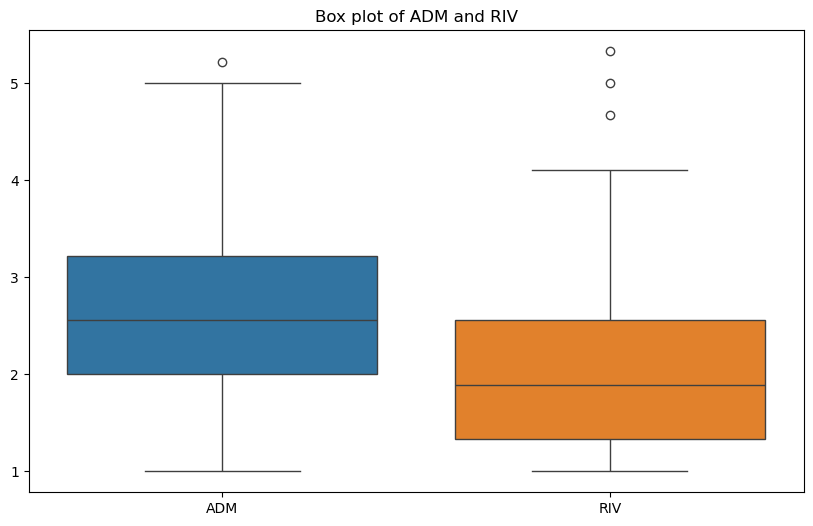

In [186]:
# plot the box chart of ADM and RIV column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['ADM', 'RIV']])
plt.title('Box plot of ADM and RIV')
plt.show()


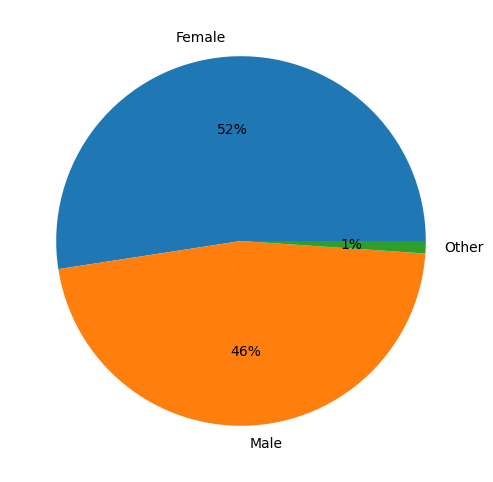

In [215]:
# Plot gender distribution
plt.figure(figsize=(10, 6))
plt.pie(data['Gender'].value_counts(),labels=['Female','Male','Other']
        ,autopct='%.0f%%')
plt.show()

## Text analisis

In [187]:
data['Length_abor'] = data['POST___ABORTION'].str.len()
data['Length_trav'] = data['POST___TRAVEL'].str.len()
data[['POST___ABORTION','POST___TRAVEL','Length_abor','Length_trav']].head(5)

,POST___ABORTION,POST___TRAVEL,Length_abor,Length_trav
0,Banning abortion is against human rights if ch...,"We travellee to australia, the country was hot...",111,119
1,"Once again, men are dictating what women shoul...",Recently went to Iceland and can't believe how...,73,142
2,Very unsure on the new government legislation....,So excited to pick up my new BMW. It will be g...,159,123
3,Don't agree . There should be freedom of choice,Time travelling in thf future and back in time,47,46
4,everyone has a right to bodily autonomy - bann...,barcelona is my favourite place to visit,72,40


In [188]:
# word count function
def word_count(text):
    words = text.split()
    return len(words)

In [189]:
data['Word_count_abor'] = data['POST___ABORTION'].apply(word_count)
data['Word_count_trav'] = data['POST___TRAVEL'].apply(word_count)
data[['POST___ABORTION','POST___TRAVEL','Word_count_abor',
      'Word_count_trav']].head(5)

,POST___ABORTION,POST___TRAVEL,Word_count_abor,Word_count_trav
0,Banning abortion is against human rights if ch...,"We travellee to australia, the country was hot...",20,22
1,"Once again, men are dictating what women shoul...",Recently went to Iceland and can't believe how...,13,27
2,Very unsure on the new government legislation....,So excited to pick up my new BMW. It will be g...,26,27
3,Don't agree . There should be freedom of choice,Time travelling in thf future and back in time,9,9
4,everyone has a right to bodily autonomy - bann...,barcelona is my favourite place to visit,12,7


In [190]:
np.mean([len(sent) for sent in 
         tokenize.sent_tokenize(data['POST___ABORTION'][0])])

55.0

In [191]:
# mean sentence length lambda function
data['Mean_sentence_length_abor'] = data['POST___ABORTION'].apply(
    lambda x: np.mean([len(sent) for sent in tokenize.sent_tokenize(x)]))
data['Mean_sentence_length_trav'] = data['POST___TRAVEL'].apply(
    lambda x: np.mean([len(sent) for sent in tokenize.sent_tokenize(x)]))
data[['POST___ABORTION','POST___TRAVEL',
      'Mean_sentence_length_abor','Mean_sentence_length_trav']].head(5)


,POST___ABORTION,POST___TRAVEL,Mean_sentence_length_abor,Mean_sentence_length_trav
0,Banning abortion is against human rights if ch...,"We travellee to australia, the country was hot...",55.000000,39.000000
1,"Once again, men are dictating what women shoul...",Recently went to Iceland and can't believe how...,73.000000,70.500000
2,Very unsure on the new government legislation....,So excited to pick up my new BMW. It will be g...,52.333333,40.333333
3,Don't agree . There should be freedom of choice,Time travelling in thf future and back in time,23.000000,46.000000
4,everyone has a right to bodily autonomy - bann...,barcelona is my favourite place to visit,72.000000,40.000000


In [192]:
# Plot two distributions with legend
def visualize(col_ab, col_trav,title):
    plt.subplot(1,2,2)
    sns.kdeplot(data[col_ab], label='abortion')
    sns.kdeplot(data[col_trav], label='travel')
    legend = plt.legend()
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')

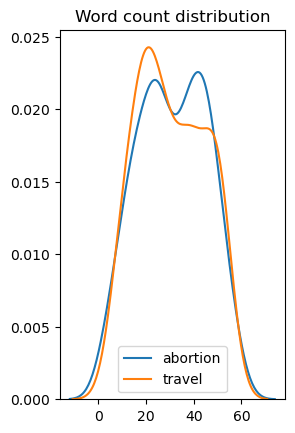

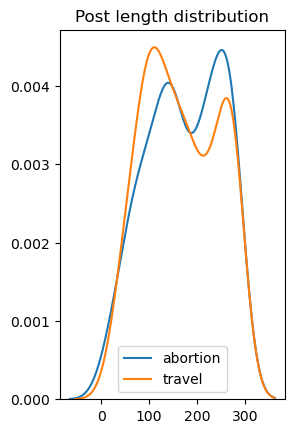

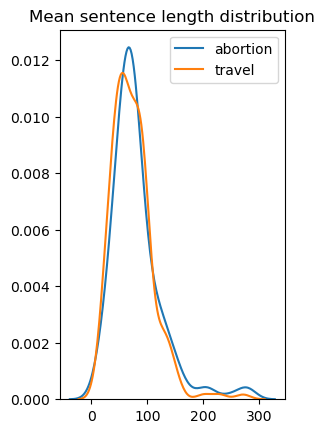

In [193]:
# visualize the distributions of the word count and the mean sentence length
visualize('Word_count_abor', 'Word_count_trav','Word count distribution')
plt.show()
visualize('Length_abor', 'Length_trav', 'Post length distribution')
plt.show()
visualize('Mean_sentence_length_abor', 
          'Mean_sentence_length_trav', 'Mean sentence length distribution')
plt.show()


In [1]:
# TODO: Find twitter statistics for comparison

## Term Frequency Analysis

In [194]:
def clean(review):
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() 
                       if word not in stopwords.words('english')])
    return review

In [195]:
data['POST___ABORTION'] = data['POST___ABORTION'].apply(clean)
data['POST___TRAVEL'] = data['POST___TRAVEL'].apply(clean)
data.head(2)

,POST___TRAVEL,POST___ABORTION,ADM,RIV,Gender,Gender_3_TEXT,Age,Ethnic_background,Ethnic_background_8_TEXT,Education,...,FFNI_Neurotic,FFNI_Agentic,GCB_MEAN,PUR_MEAN,Length_abor,Length_trav,Word_count_abor,Word_count_trav,Mean_sentence_length_abor,Mean_sentence_length_trav
0,travellee australia country hot amazing love b...,banning abortion human rights choice awful wom...,3.33,2.78,1,NaN,38,1,NaN,2,...,3.33,3.75,5.00,3.67,111,119,20,22,55.0,39.0
1,recently went iceland cant believe beautiful l...,men dictating women bodies,2.78,1.22,2,NaN,28,8,British,1,...,1.33,3.25,2.87,1.80,73,142,13,27,73.0,70.5


In [196]:
def corpus(text):
    text_list = text.split()
    return text_list

In [197]:
data['POST___ABORTION_lists'] = data['POST___ABORTION'].apply(corpus)
data['POST___TRAVEL_lists'] = data['POST___TRAVEL'].apply(corpus)
data.head(2)

,POST___TRAVEL,POST___ABORTION,ADM,RIV,Gender,Gender_3_TEXT,Age,Ethnic_background,Ethnic_background_8_TEXT,Education,...,GCB_MEAN,PUR_MEAN,Length_abor,Length_trav,Word_count_abor,Word_count_trav,Mean_sentence_length_abor,Mean_sentence_length_trav,POST___ABORTION_lists,POST___TRAVEL_lists
0,travellee australia country hot amazing love b...,banning abortion human rights choice awful wom...,3.33,2.78,1,NaN,38,1,NaN,2,...,5.00,3.67,111,119,20,22,55.0,39.0,"[banning, abortion, human, rights, choice, awf...","[travellee, australia, country, hot, amazing, ..."
1,recently went iceland cant believe beautiful l...,men dictating women bodies,2.78,1.22,2,NaN,28,8,British,1,...,2.87,1.80,73,142,13,27,73.0,70.5,"[men, dictating, women, bodies]","[recently, went, iceland, cant, believe, beaut..."


In [198]:
corpus_ab = []
corpus_tr = []
for text in data['POST___ABORTION_lists']:
    corpus_ab += text
for text in data['POST___TRAVEL_lists']:
    corpus_tr += text
print(f"Abortion total words:\t{len(corpus_ab)} \nTravel total words:\t{len(corpus_tr)}")

Abortion total words:	2753 
Travel total words:	2924


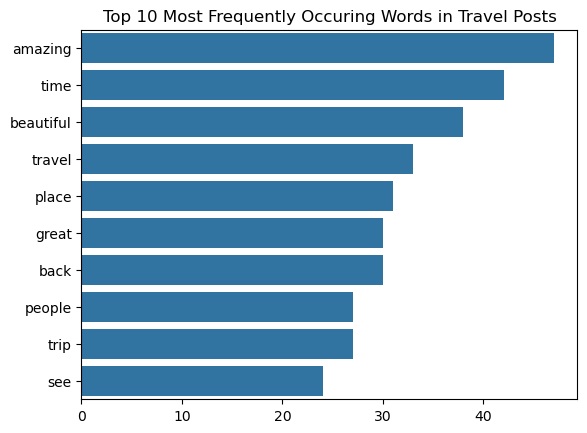

In [200]:
mostCommon_ab = Counter(corpus_ab).most_common(10)
mostCommon_tr = Counter(corpus_tr).most_common(10)

words = []
freq = []
for word, count in mostCommon_tr:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words in Travel Posts')
plt.show()


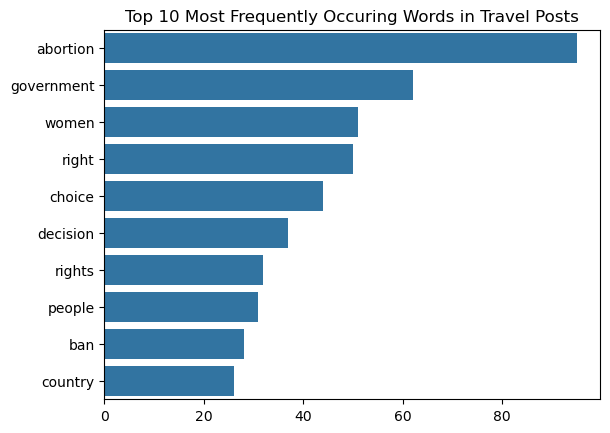

In [201]:
words = []
freq = []
for word, count in mostCommon_ab:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words in Travel Posts')
plt.show()

In [202]:
def bigram_freq(column):
    cv = CountVectorizer(ngram_range=(2,2))
    bigrams = cv.fit_transform(column)
    count_values = bigrams.toarray().sum(axis=0)
    bigram_freq = pd.DataFrame(
        sorted([(count_values[i], k) 
                for k, i in cv.vocabulary_.items()], reverse = True))
    bigram_freq.columns = ["frequency", "bigram"]
    return bigram_freq


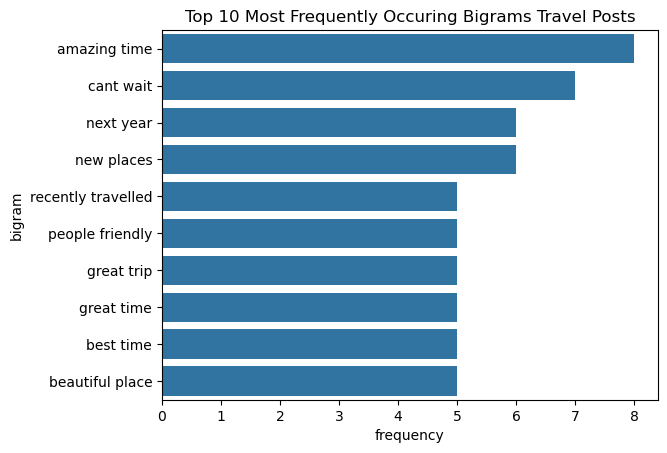

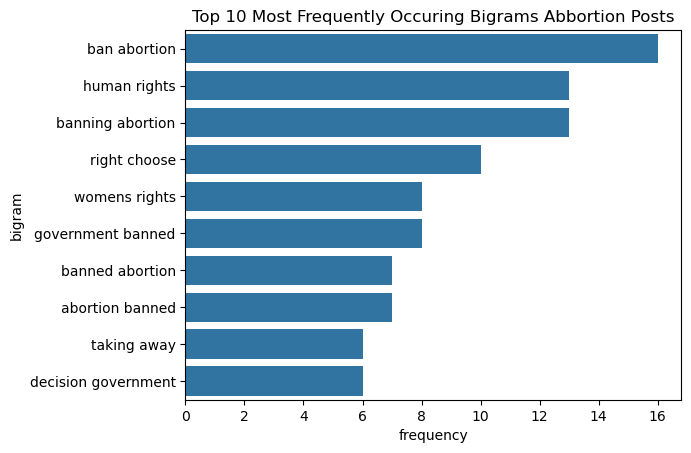

In [203]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams_ab_freq = bigram_freq(data['POST___ABORTION'])
bigrams_tr_freq = bigram_freq(data['POST___TRAVEL'])

sns.barplot(x=bigrams_tr_freq['frequency'][:10], 
            y=bigrams_tr_freq['bigram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams Travel Posts')
plt.show()

sns.barplot(x=bigrams_ab_freq['frequency'][:10], 
            y=bigrams_ab_freq['bigram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams Abbortion Posts')
plt.show()


In [204]:
columns_for_corr_1 = ['ADM', 'RIV', 'Length_abor', 'Length_trav', 'Word_count_abor', 'Word_count_trav', 'Mean_sentence_length_abor', 'Mean_sentence_length_trav']
columns_for_corr_2 = ['ADM', 'RIV','Gender','Age', 'Education', 'Marital_status','Employment','Twitter']

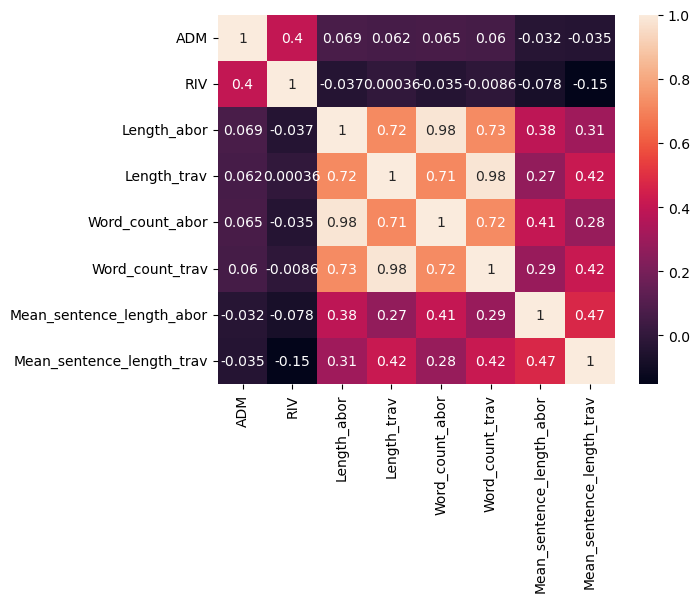

In [205]:
sns.heatmap(data[columns_for_corr_1].corr(), annot=True)
plt.show()

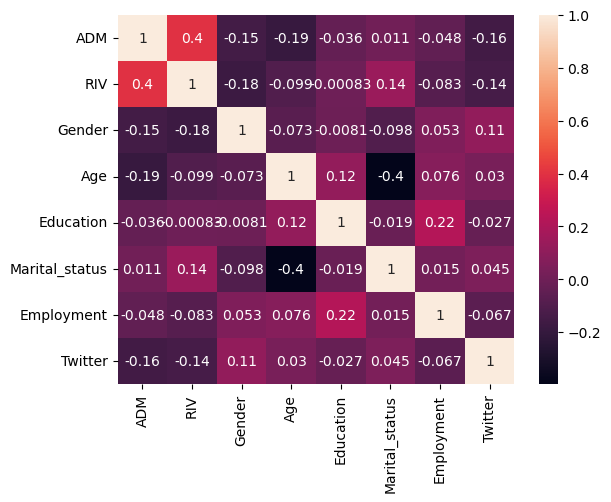

In [206]:
sns.heatmap(data[columns_for_corr_2].corr(), annot=True)
plt.show()